In [1]:
from pycaret.regression import setup, compare_models, evaluate_model, predict_model, save_model, load_model, plot_model, get_config, interpret_model

In [17]:
import pandas as pd
weather = pd.read_csv("C:/Users/nasut/OneDrive/Documents/Kuliah/Semester 7/PKKM/BMKG/Project/Data/data_fix_temp.txt")

In [18]:
weather.head()

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
1,2021-02-27 15:00:00,96001,0.0,0.0,0,27.3973,21.6059,70.8014,3.43326,12.4580,...,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2
2,2021-02-27 18:00:00,96001,0.0,0.0,0,27.0090,21.5161,72.0376,3.04901,27.2450,...,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0
3,2021-02-27 21:00:00,96001,0.0,0.0,0,26.5672,21.4226,73.5149,2.04556,37.3569,...,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6
4,2021-02-28 00:00:00,96001,0.0,0.0,0,26.4519,21.5400,74.5507,2.22508,20.1816,...,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8
5,2021-02-28 03:00:00,96001,0.0,0.0,0,26.7230,21.3691,72.6038,2.34268,14.7934,...,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4


In [19]:
weather.columns

Index(['Date', 'lokasi', 'con_prec.mm.', 'mic_prec.mm.', 'sha_prec.mm.',
       'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.', 'wdir.deg.',
       'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.', 'clmix.kg.kg.',
       'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.', 'cape.j.kg.',
       'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.', 'wd950.deg.',
       't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.', 't500.degC.',
       'rh500...', 'ws500.m.s.', 'wd500.deg.', 'hari', 'UTC', 'LAT', 'LON',
       'ELEV', 't_obs'],
      dtype='object')

In [20]:
weather.dtypes

Date             object
lokasi            int64
con_prec.mm.    float64
mic_prec.mm.    float64
sha_prec.mm.      int64
suhu2m.degC.    float64
dew2m.degC.     float64
rh2m...         float64
wspeed.m.s.     float64
wdir.deg.       float64
lcloud...       float64
mcloud...       float64
hcloud...       float64
surpre.Pa.      float64
clmix.kg.kg.    float64
wamix.kg.kg.    float64
outlr.W.m2.     float64
pblh.m.         float64
lifcl.m.        float64
cape.j.kg.      float64
mdbz            float64
t950.degC.      float64
rh950...        float64
ws950.m.s.      float64
wd950.deg.      float64
t800.degC.      float64
rh800...        float64
ws800.m.s.      float64
wd800.deg.      float64
t500.degC.      float64
rh500...        float64
ws500.m.s.      float64
wd500.deg.      float64
hari              int64
UTC               int64
LAT             float64
LON             float64
ELEV              int64
t_obs           float64
dtype: object

In [21]:
weather = weather[-10000:]
weather.shape

(10000, 39)

In [22]:
weather.agg(['nunique']).T

,nunique
Date,3815
lokasi,5
con_prec.mm.,6961
mic_prec.mm.,3316
sha_prec.mm.,1
suhu2m.degC.,9406
dew2m.degC.,9086
rh2m...,9774
wspeed.m.s.,9881
wdir.deg.,9781


In [23]:
weather_dropped = weather.drop(columns=['hari', 'UTC', 'LAT', 'LON','hari'])

In [24]:
setup??

Signature:
setup(
    data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    data_func: Union[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame]], NoneType] = None,
    target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1,
    index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True,
    train_size: float = 0.7,
    test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    ordinal_features: Union[Dict[str, list], NoneType] = None,
    numeric_features: Union[List[str], NoneType] = None,
    categorical_features: Union[List[str], NoneType] = None,
    date_features: Union[List[str], NoneType] = None,
    text_features: Union[List[str], NoneType] = None,
    ignore_features: Union[List[str], NoneType] = None,
    keep_featu

In [25]:
s = setup(weather_dropped, target='t_obs', train_size=0.85, n_jobs=5, use_gpu=True, normalize = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

,Description,Value
0,Session id,187
1,Target,t_obs
2,Target type,Regression
3,Original data shape,"(10000, 35)"
4,Transformed data shape,"(10000, 35)"
5,Transformed train set shape,"(8500, 35)"
6,Transformed test set shape,"(1500, 35)"
7,Numeric features,33
8,Categorical features,1
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

In [26]:
compare_models??

Signature:
compare_models(
    include: Union[List[Union[str, Any]], NoneType] = None,
    exclude: Union[List[str], NoneType] = None,
    fold: Union[int, Any, NoneType] = None,
    round: int = 4,
    cross_validation: bool = True,
    sort: str = 'R2',
    n_select: int = 1,
    budget_time: Union[float, NoneType] = None,
    turbo: bool = True,
    errors: str = 'ignore',
    fit_kwargs: Union[dict, NoneType] = None,
    groups: Union[str, Any, NoneType] = None,
    experiment_custom_tags: Union[Dict[str, Any], NoneType] = None,
    engine: Union[Dict[str, str], NoneType] = None,
    verbose: bool = True,
    parallel: Union[pycaret.internal.parallel.parallel_backend.ParallelBackend, NoneType] = None,
)
Source:   
@check_if_global_is_not_none(globals(), _CURRENT_EXPERIMENT_DECORATOR_DICT)
def compare_models(
    include: Optional[List[Union[str, Any]]] = None,
    exclude: Optional[List[str]] = None,
    fold: Optional[Union[int, Any]] = None,
    round: int = 4,
    cross_validati

In [27]:
from pycaret.regression import models
models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [28]:
best_model = compare_models(sort='R2', include=['et'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.3294,3.2280,1.7959,0.5757,0.0614,0.0476,0.9500


In [29]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [30]:
train_data = get_config(variable='X_train')
test_data = get_config(variable='X_test')

In [31]:
train_data

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
535557,2022-12-03 00:00:00,97900,0.000000,0.000000e+00,0,28.381701,23.380899,74.453102,0.410784,147.496994,...,227.772003,16.237801,51.048901,3.79029,120.849998,-4.51129,72.302299,6.336680,300.497986,24
539748,2021-11-20 18:00:00,97980,0.000000,0.000000e+00,0,23.121599,23.028099,99.592697,1.773530,94.372498,...,107.641998,15.852400,86.792297,7.54888,91.679001,-4.43837,47.634800,8.438050,88.689903,0
539401,2021-09-28 03:00:00,97980,0.307179,7.775380e-24,0,31.535601,21.218000,54.441898,3.548440,144.789993,...,105.902000,14.925400,89.037804,8.42678,92.198700,-3.89771,15.209700,5.679940,90.102997,0
540458,2022-04-28 06:00:00,97980,1.727560,2.054360e-11,0,29.578300,25.604799,79.346703,5.497400,163.199997,...,151.348007,16.350800,76.491302,4.58656,122.356003,-3.65450,45.856701,9.753810,110.349998,0
536554,2021-08-09 00:00:00,97978,0.003806,7.847480e-06,0,25.945900,22.268000,80.304199,5.778390,113.498001,...,111.549004,14.177800,84.999397,6.50569,107.142998,-6.16721,93.430603,8.084160,22.258900,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538702,2021-05-29 21:00:00,97980,0.000000,0.000000e+00,0,20.988501,19.190100,89.626099,3.032270,111.542000,...,121.964996,13.903300,68.325600,4.07818,129.757996,-3.50414,16.700399,3.960570,206.044006,0
536220,2021-04-08 00:00:00,97978,0.030897,0.000000e+00,0,26.932400,23.808901,83.159103,2.724650,338.989990,...,335.539001,14.569700,83.486099,3.05595,286.308990,-4.76775,87.945297,0.407302,82.351501,5
541507,2023-01-24 00:00:00,97980,0.000000,7.344570e-03,0,27.346701,24.556801,84.881203,1.731560,358.972992,...,320.011993,16.602699,72.467499,1.53196,35.354599,-4.36650,80.783401,10.055600,60.313202,0
539681,2021-11-11 03:00:00,97980,0.335121,9.960030e-26,0,31.226000,23.638201,64.188202,3.238700,221.901001,...,233.576996,15.858000,93.235802,1.21366,38.993099,-3.55370,19.538700,7.150330,85.621300,0


In [32]:
get_config(variable='X_train_transformed')

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
535557,-0.140325,-0.628775,-0.408095,-0.063430,0.0,0.304890,0.012358,-0.362973,-1.663280,-0.299477,...,0.595484,0.902939,-1.846863,-0.494719,-0.466372,0.172540,0.538705,0.293897,1.712427,-0.019993
539748,-1.052958,-0.536300,-0.408095,-0.063430,0.0,-1.768990,-0.207551,1.701689,-0.955798,-0.866402,...,-0.740834,0.455732,0.572425,0.528979,-0.793862,0.270918,-0.428844,1.024683,-0.617346,-0.255638
539401,1.161637,-0.536300,-0.197277,-0.063430,0.0,1.548366,-1.335826,-2.006451,-0.034338,-0.328365,...,-0.760189,-0.619931,0.724412,0.768085,-0.788028,1.000332,-1.700675,0.065505,-0.601803,-0.255638
540458,0.503072,-0.536300,0.777532,-0.063430,0.0,0.776669,1.398565,0.038928,0.977482,-0.131901,...,-0.254651,1.034060,-0.124797,-0.277845,-0.449465,1.328452,-0.498588,1.482260,-0.379097,-0.255638
536554,-0.986542,-0.538612,-0.405483,-0.063422,0.0,-0.655464,-0.681338,0.117565,1.123361,-0.662302,...,-0.697372,-1.487422,0.451073,0.244853,-0.620255,-2.061492,1.367435,0.901612,-1.348051,-0.206545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538702,-1.682029,-0.536300,-0.408095,-0.063430,0.0,-2.609999,-2.599863,0.883153,-0.302312,-0.683176,...,-0.581506,-1.805944,-0.677492,-0.416309,-0.366366,1.531305,-1.642204,-0.532434,0.673485,-0.255638
536220,-0.798380,-0.538612,-0.386890,-0.063430,0.0,-0.266520,0.279141,0.352032,-0.462016,1.744065,...,1.794277,-1.032673,0.348645,-0.694725,1.391164,-0.173454,1.152281,-1.768140,-0.687065,-0.206545
541507,-0.265256,-0.536300,-0.408095,-0.056166,0.0,-0.103175,0.745324,0.493465,-0.977588,1.957317,...,1.621556,1.326357,-0.397148,-1.109803,-1.426192,0.367879,0.871365,1.587212,-0.929474,-0.255638
539681,1.880362,-0.536300,-0.178101,-0.063430,0.0,1.426301,0.172739,-1.206008,-0.195142,0.494535,...,0.660059,0.462230,1.008553,-1.196495,-1.385344,1.464443,-1.530876,0.576857,-0.651099,-0.255638


In [33]:
test_data

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
541585,2023-02-10 06:00:00,97980,3.523750,0.000000e+00,0,28.162600,25.430201,85.248802,8.11081,289.494995,...,292.964996,15.558400,85.157799,22.057400,290.782990,-3.66840,87.061203,11.33350,316.812012,0
536344,2021-05-26 03:00:00,97978,0.325343,0.000000e+00,0,29.616301,20.983101,59.898701,5.32004,123.103996,...,123.902000,13.330800,84.413300,5.362570,109.737000,-2.95094,27.530001,4.81077,156.854996,5
535331,2022-08-29 12:00:00,97900,0.021801,0.000000e+00,0,26.025801,24.545300,91.691002,5.63973,118.853996,...,116.820000,15.863400,69.316200,4.713150,105.842003,-4.05031,14.338200,3.91494,133.701996,24
544159,2023-03-10 00:00:00,99992,0.010045,0.000000e+00,0,24.629400,22.852800,89.992401,1.60333,87.914703,...,128.638000,14.445600,87.177101,1.403900,185.699005,-5.45947,83.692299,4.85562,100.525002,41
540648,2022-06-09 18:00:00,97980,0.000000,1.839980e-24,0,22.750500,22.724001,100.000000,1.81166,103.157997,...,114.528000,14.679600,86.432899,5.457280,95.910500,-5.14819,57.517502,3.19020,97.243401,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542064,2021-03-19 06:00:00,99992,0.926899,1.834090e-03,0,30.879700,23.988701,66.863998,2.63968,348.325989,...,321.537994,15.375900,84.566002,0.520496,254.300003,-5.08223,63.516499,4.06422,117.946999,41
537107,2022-01-02 06:00:00,97978,0.458730,1.353990e-09,0,30.765200,23.941200,67.111298,4.16186,267.317993,...,274.459015,16.068100,81.278000,5.036210,292.808990,-4.30825,76.146896,4.52423,110.111000,5
540360,2022-03-28 00:00:00,97980,0.172449,0.000000e+00,0,28.462000,24.910801,81.226196,3.69891,288.476013,...,289.593994,15.952600,79.335098,7.689200,287.339996,-5.45591,84.850800,3.12534,307.485992,0
539862,2021-12-11 06:00:00,97980,2.168520,0.000000e+00,0,28.341700,25.610001,85.268700,5.42274,260.380005,...,262.554993,15.946200,89.325401,7.574990,265.988007,-3.73183,84.215897,3.35984,225.097000,0


In [34]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.2469,2.8910,1.7003,0.6114,0.0580,0.0444


,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,t_obs,prediction_label
541585,2023-02-10 06:00:00,97980,3.523750,0.000000e+00,0,28.162600,25.430201,85.248802,8.11081,289.494995,...,85.157799,22.057400,290.782990,-3.66840,87.061203,11.33350,316.812012,0,28.600000,25.916
536344,2021-05-26 03:00:00,97978,0.325343,0.000000e+00,0,29.616301,20.983101,59.898701,5.32004,123.103996,...,84.413300,5.362570,109.737000,-2.95094,27.530001,4.81077,156.854996,5,30.100000,29.663
535331,2022-08-29 12:00:00,97900,0.021801,0.000000e+00,0,26.025801,24.545300,91.691002,5.63973,118.853996,...,69.316200,4.713150,105.842003,-4.05031,14.338200,3.91494,133.701996,24,26.000000,26.904
544159,2023-03-10 00:00:00,99992,0.010045,0.000000e+00,0,24.629400,22.852800,89.992401,1.60333,87.914703,...,87.177101,1.403900,185.699005,-5.45947,83.692299,4.85562,100.525002,41,24.799999,25.265
540648,2022-06-09 18:00:00,97980,0.000000,1.839980e-24,0,22.750500,22.724001,100.000000,1.81166,103.157997,...,86.432899,5.457280,95.910500,-5.14819,57.517502,3.19020,97.243401,0,24.700001,26.354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542064,2021-03-19 06:00:00,99992,0.926899,1.834090e-03,0,30.879700,23.988701,66.863998,2.63968,348.325989,...,84.566002,0.520496,254.300003,-5.08223,63.516499,4.06422,117.946999,41,31.799999,32.714
537107,2022-01-02 06:00:00,97978,0.458730,1.353990e-09,0,30.765200,23.941200,67.111298,4.16186,267.317993,...,81.278000,5.036210,292.808990,-4.30825,76.146896,4.52423,110.111000,5,24.799999,30.337
540360,2022-03-28 00:00:00,97980,0.172449,0.000000e+00,0,28.462000,24.910801,81.226196,3.69891,288.476013,...,79.335098,7.689200,287.339996,-5.45591,84.850800,3.12534,307.485992,0,27.400000,27.747
539862,2021-12-11 06:00:00,97980,2.168520,0.000000e+00,0,28.341700,25.610001,85.268700,5.42274,260.380005,...,89.325401,7.574990,265.988007,-3.73183,84.215897,3.35984,225.097000,0,29.100000,28.950


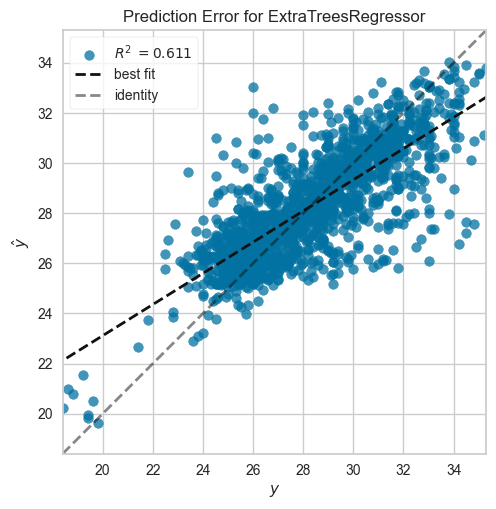

In [35]:
plot_model(best_model, plot='error')

In [36]:
best_model.get_params

<bound method BaseEstimator.get_params of ExtraTreesRegressor(n_jobs=5, random_state=187)>

In [37]:
from pycaret.regression import tune_model
best_model_tuned = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3579,2.8770,1.6962,0.6110,0.0581,0.0487
1,1.3698,2.9972,1.7312,0.6149,0.0593,0.0487
2,1.3212,2.7881,1.6698,0.6252,0.0575,0.0475
3,1.3255,2.8596,1.6910,0.6273,0.0576,0.0472
4,1.3797,3.0033,1.7330,0.6077,0.0593,0.0491
5,1.3264,2.8010,1.6736,0.6390,0.0569,0.0467
6,1.2888,2.7668,1.6634,0.6079,0.0575,0.0466
7,1.3576,2.9677,1.7227,0.6227,0.0595,0.0489
8,1.2606,2.5037,1.5823,0.6757,0.0541,0.0448


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [38]:
predict_model(best_model_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.2980,2.7896,1.6702,0.6250,0.0571,0.0462


,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,t_obs,prediction_label
541585,2023-02-10 06:00:00,97980,3.523750,0.000000e+00,0,28.162600,25.430201,85.248802,8.11081,289.494995,...,85.157799,22.057400,290.782990,-3.66840,87.061203,11.33350,316.812012,0,28.600000,27.228889
536344,2021-05-26 03:00:00,97978,0.325343,0.000000e+00,0,29.616301,20.983101,59.898701,5.32004,123.103996,...,84.413300,5.362570,109.737000,-2.95094,27.530001,4.81077,156.854996,5,30.100000,29.265278
535331,2022-08-29 12:00:00,97900,0.021801,0.000000e+00,0,26.025801,24.545300,91.691002,5.63973,118.853996,...,69.316200,4.713150,105.842003,-4.05031,14.338200,3.91494,133.701996,24,26.000000,26.965556
544159,2023-03-10 00:00:00,99992,0.010045,0.000000e+00,0,24.629400,22.852800,89.992401,1.60333,87.914703,...,87.177101,1.403900,185.699005,-5.45947,83.692299,4.85562,100.525002,41,24.799999,26.107222
540648,2022-06-09 18:00:00,97980,0.000000,1.839980e-24,0,22.750500,22.724001,100.000000,1.81166,103.157997,...,86.432899,5.457280,95.910500,-5.14819,57.517502,3.19020,97.243401,0,24.700001,25.791944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542064,2021-03-19 06:00:00,99992,0.926899,1.834090e-03,0,30.879700,23.988701,66.863998,2.63968,348.325989,...,84.566002,0.520496,254.300003,-5.08223,63.516499,4.06422,117.946999,41,31.799999,31.100556
537107,2022-01-02 06:00:00,97978,0.458730,1.353990e-09,0,30.765200,23.941200,67.111298,4.16186,267.317993,...,81.278000,5.036210,292.808990,-4.30825,76.146896,4.52423,110.111000,5,24.799999,30.146389
540360,2022-03-28 00:00:00,97980,0.172449,0.000000e+00,0,28.462000,24.910801,81.226196,3.69891,288.476013,...,79.335098,7.689200,287.339996,-5.45591,84.850800,3.12534,307.485992,0,27.400000,27.832222
539862,2021-12-11 06:00:00,97980,2.168520,0.000000e+00,0,28.341700,25.610001,85.268700,5.42274,260.380005,...,89.325401,7.574990,265.988007,-3.73183,84.215897,3.35984,225.097000,0,29.100000,28.365278


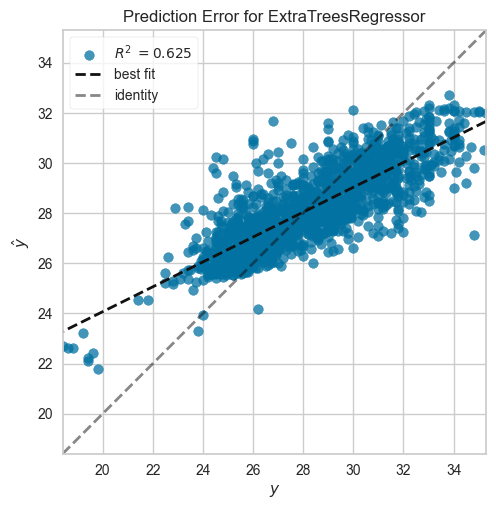

In [39]:
plot_model(best_model_tuned, plot='error')

In [40]:
best_model_tuned.get_params

<bound method BaseEstimator.get_params of ExtraTreesRegressor(criterion='absolute_error', max_depth=7,
                    max_features='log2', min_impurity_decrease=0.001,
                    min_samples_leaf=4, min_samples_split=7, n_estimators=180,
                    n_jobs=5, random_state=187)>

In [41]:
plot_model(best_model_tuned, plot='parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,absolute_error
max_depth,7
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.001
min_samples_leaf,4
min_samples_split,7


In [27]:
# save_model(best_model, 'xgboost_tuned_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['lokasi', 'con_prec.mm.',
                                              'mic_prec.mm.', 'sha_prec.mm.',
                                              'suhu2m.degC.', 'dew2m.degC.',
                                              'rh2m...', 'wspeed.m.s.',
                                              'wdir.deg.', 'lcloud...',
                                              'mcloud...', 'hcloud...',
                                              'surpre.Pa.', 'clmix.kg.kg.',
                                              'wamix.kg.kg.', 'outlr.W.m2.',
                                              'pblh.m.', 'lifcl.m.',
                                              'cape.j.kg.', 'mdbz', 't9...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_cons